# ANLY 590 Final Project

**Yachen Li, Yating Liang, Yihan Zhou, Xinyao Mo**


## Explore Data


In [ ]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from tensorflow.keras.models import Sequential

import tensorflow.keras.activations as Actications
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [ ]:
from google.colab import drive
import sys
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%%time
#copy data to colab wd, reduce runtime
from pathlib import Path
base = Path('/content/drive/My Drive/ANLY 590 Project/')
#base = Path('/content/drive/MyDrive/590momo/')#momo path
zip_path = base/'data.zip'
!cp "{zip_path}" .
!unzip -q data.zip
!rm data.zip


CPU times: user 30.9 ms, sys: 29.5 ms, total: 60.4 ms
Wall time: 15.9 s


In [ ]:
!pwd

/content


In [ ]:
import glob
##below path may change
glob.glob('/content/seg_train/seg_train/*')

['/content/seg_train/seg_train/street',
 '/content/seg_train/seg_train/mountain',
 '/content/seg_train/seg_train/buildings',
 '/content/seg_train/seg_train/sea',
 '/content/seg_train/seg_train/forest',
 '/content/seg_train/seg_train/glacier']

In [ ]:
TrainImage="/content/seg_train/seg_train"
TestImage="/content/seg_test/seg_test"
Seaimages = os.listdir(TrainImage + "/sea")
Forestimages = os.listdir(TrainImage + "/forest")
Mountimages = os.listdir(TrainImage + "/mountain")
Glacierimages = os.listdir(TrainImage + "/glacier")
Buildingsimages = os.listdir(TrainImage + "/buildings")
Streetimages = os.listdir(TrainImage + "/street")

In [ ]:
print(len(Seaimages), len(Forestimages), len(Mountimages), len(Glacierimages), len(Buildingsimages), len(Streetimages))
NUM_TRAINING_IMAGES = len(Seaimages)+ len(Forestimages)+ len(Mountimages)+ len(Glacierimages)+ len(Buildingsimages)+ len(Streetimages)
print(NUM_TRAINING_IMAGES)

2274 2271 2512 2404 2191 2382
14034


In [ ]:
image_size = 128 
batch_size = 16 
steps_per_epoch = NUM_TRAINING_IMAGES // batch_size

data_path = '/content'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(data_path + '/seg_train/seg_train',
                                                 target_size = (image_size, image_size),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

Found 14034 images belonging to 6 classes.


In [ ]:
testing_set = test_datagen.flow_from_directory(data_path + '/seg_test/seg_test',
                                            target_size = (image_size, image_size),
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True)

Found 3000 images belonging to 6 classes.


In [ ]:
print("train batch ", training_set.__getitem__(0)[0].shape)
print("test batch ", testing_set.__getitem__(0)[0].shape)

train batch  (16, 128, 128, 3)
test batch  (16, 128, 128, 3)


In [ ]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
labels = ['buildings', 'forest','glacier','mountain','sea','street']

In [ ]:
sample_data = testing_set.__getitem__(1)[0] 
sample_label = testing_set.__getitem__(1)[1] 

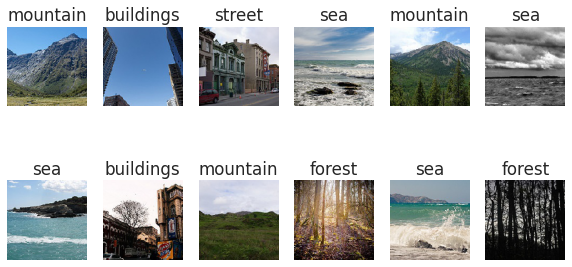

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3, 6, i + 1)
    plt.axis('off')
    plt.imshow(sample_data[i])
    plt.title(labels[np.argmax(sample_label[i])])

In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['/content/seg_train/seg_train', '/content/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)

IMAGE_SIZE = (128, 128)
(train_images, train_labels), (test_images, test_labels) = load_data()

  4%|▎         | 87/2382 [00:00<00:02, 867.09it/s]

Loading /content/seg_train/seg_train


 31%|███       | 153/501 [00:00<00:00, 1521.03it/s]

Loading /content/seg_test/seg_test


100%|██████████| 553/553 [00:00<00:00, 1663.86it/s]


In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (128, 128)


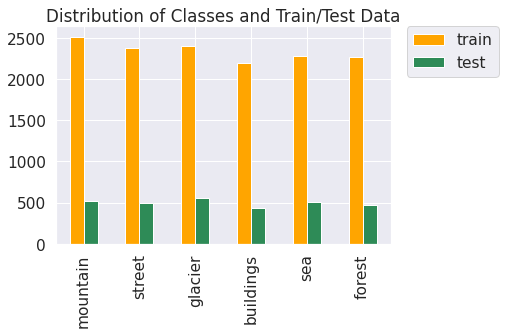

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar(color=['#FFA500','#2E8B57'])
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.) 
plt.title('Distribution of Classes and Train/Test Data')
plt.show()

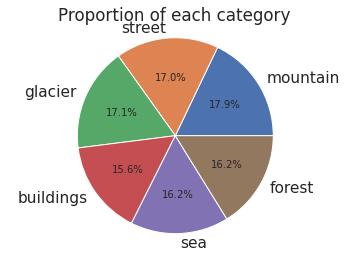

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each category')
plt.show()

## CNN

In [ ]:

model2 = tfk.Sequential()
#First conv block
model2.add(tfkl.Conv2D(filters = 32, kernel_size=(3,3),  
                      padding="same", activation='relu', input_shape=(128, 128, 3)))
model2.add(tfkl.MaxPool2D(pool_size=(2,2)))

#Second conv block
model2.add(tfkl.Conv2D(filters = 32, kernel_size=(3,3),  
                      padding="same", activation='relu'))
model2.add(tfkl.MaxPool2D(pool_size=(2,2)))


model2.add(tfkl.Flatten())
model2.add(tfkl.Dense(128, activation='relu'))

model2.add(tfkl.Dense(6, activation='softmax'))

model2.compile(tfk.optimizers.Adam(), loss=tfk.losses.BinaryCrossentropy(), metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               4194432   
_________________________________________________________________
dense_27 (Dense)             (None, 6)                

In [ ]:
results2 = model2.fit(training_set, validation_data=testing_set,  epochs=20)

Epoch 1/20
878/878 [==============================] - 61s 70ms/step - loss: 0.2808 - accuracy: 0.6063 - val_loss: 0.2202 - val_accuracy: 0.7327
Epoch 2/20
878/878 [==============================] - 61s 70ms/step - loss: 0.2206 - accuracy: 0.7134 - val_loss: 0.2038 - val_accuracy: 0.7420
Epoch 3/20
878/878 [==============================] - 60s 68ms/step - loss: 0.1923 - accuracy: 0.7536 - val_loss: 0.1944 - val_accuracy: 0.7620
Epoch 4/20
878/878 [==============================] - 60s 69ms/step - loss: 0.1811 - accuracy: 0.7708 - val_loss: 0.1692 - val_accuracy: 0.7920
Epoch 5/20
878/878 [==============================] - 60s 69ms/step - loss: 0.1719 - accuracy: 0.7867 - val_loss: 0.1626 - val_accuracy: 0.8040
Epoch 6/20
878/878 [==============================] - 60s 68ms/step - loss: 0.1642 - accuracy: 0.7979 - val_loss: 0.1553 - val_accuracy: 0.8220
Epoch 7/20
878/878 [==============================] - 60s 68ms/step - loss: 0.1519 - accuracy: 0.8159 - val_loss: 0.1725 - val_accuracy:

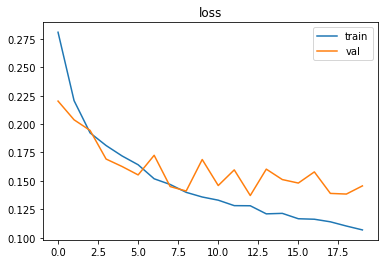

In [ ]:
plt.plot(results2.history["loss"])
plt.plot(results2.history["val_loss"])
plt.title("loss")
plt.legend(labels=["train", "val"])

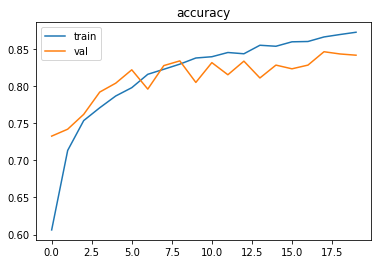

In [ ]:
plt.plot(results2.history["accuracy"])
plt.plot(results2.history["val_accuracy"])
plt.title("accuracy")
plt.legend(labels=["train", "val"])

In [ ]:
model2.evaluate(testing_set, verbose=1)

188/188 [==============================] - 3s 15ms/step - loss: 0.1456 - accuracy: 0.8417


[0.14559558033943176, 0.8416666388511658]

##VGG16


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
pretrained_model=VGG16(input_shape = (128, 128, 3), 
                        include_top = False, 
                        weights = 'imagenet')

for layer in pretrained_model.layers:
     layer.trainable = False

# pretrained_model.summary()
last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output= last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 



58892288/58889256 [==============================] - 0s 0us/step
last layer of vgg : output shape:  (None, 4, 4, 512)


In [ ]:
model_vgg.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model_vgg.compile(optimizer = RMSprop(lr=0.0001), loss=tfk.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

#model.compile(optimizer = RMSprop(lr=0.0001), 
              #loss = 'sparse_categorical_crossentropy', 
              #metrics = ['acc'])

In [ ]:
vgg_history=model_vgg.fit(training_set, validation_data=testing_set,
                          epochs=20,
                          batch_size = 128,verbose = 1)
#vgg_history=model_vgg16.fit(X_train, y_train_cat,batch_size = 100,epochs = 20, validation_data = (X_val, y_val_cat),  callbacks = callbacks_list, verbose = 1)

Epoch 1/20
878/878 [==============================] - 73s 83ms/step - loss: 0.5175 - accuracy: 0.8118 - val_loss: 0.4814 - val_accuracy: 0.8300
Epoch 2/20
878/878 [==============================] - 70s 79ms/step - loss: 0.4365 - accuracy: 0.8439 - val_loss: 0.3702 - val_accuracy: 0.8767
Epoch 3/20
878/878 [==============================] - 69s 79ms/step - loss: 0.3988 - accuracy: 0.8609 - val_loss: 0.4364 - val_accuracy: 0.8510
Epoch 4/20
878/878 [==============================] - 70s 79ms/step - loss: 0.3840 - accuracy: 0.8646 - val_loss: 0.4006 - val_accuracy: 0.8707
Epoch 5/20
878/878 [==============================] - 69s 79ms/step - loss: 0.3637 - accuracy: 0.8766 - val_loss: 0.3690 - val_accuracy: 0.8700
Epoch 6/20
878/878 [==============================] - 69s 79ms/step - loss: 0.3538 - accuracy: 0.8779 - val_loss: 0.3621 - val_accuracy: 0.8837
Epoch 7/20
878/878 [==============================] - 69s 79ms/step - loss: 0.3414 - accuracy: 0.8833 - val_loss: 0.3534 - val_accuracy:

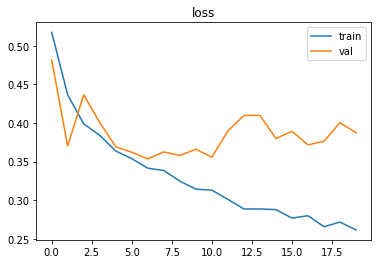

In [ ]:
plt.plot(vgg_history.history["loss"])
plt.plot(vgg_history.history["val_loss"])
plt.title("loss")
plt.legend(labels=["train", "val"])

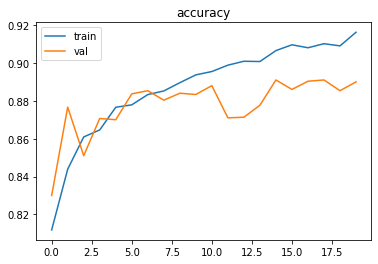

In [ ]:
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history["val_accuracy"])
plt.title("accuracy")
plt.legend(labels=["train", "val"])

In [ ]:
model_vgg.evaluate(testing_set, verbose=1)

188/188 [==============================] - 5s 25ms/step - loss: 0.3872 - accuracy: 0.8900


[0.38720154762268066, 0.8899999856948853]

## ResNet50


In [ ]:
from tensorflow.keras.applications import ResNet50

pretrained_model=ResNet50( input_shape=(128,128,3),
                                  include_top=False,
                                  weights='imagenet')
for layer in pretrained_model.layers:
     layer.trainable = False

#pretrained_model.summary()


In [ ]:
last_layer = pretrained_model.get_layer('conv5_block3_out')
print('last layer of ResNet : output shape: ', last_layer.output_shape)
last_output = last_layer.output


x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)

model_resnet = Model(pretrained_model.input, x) 

model_resnet.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

#model_resnet.summary()

last layer of ResNet : output shape:  (None, 4, 4, 2048)


In [ ]:
resnet_history=model_resnet.fit(training_set, validation_data=testing_set,
                          epochs=20,
                          batch_size = 128,verbose = 1)

Epoch 1/20
878/878 [==============================] - 75s 85ms/step - loss: 1.3929 - acc: 0.4227 - val_loss: 1.0997 - val_acc: 0.5747
Epoch 2/20
878/878 [==============================] - 72s 82ms/step - loss: 1.1615 - acc: 0.5251 - val_loss: 1.0224 - val_acc: 0.5953
Epoch 3/20
878/878 [==============================] - 72s 82ms/step - loss: 1.0977 - acc: 0.5549 - val_loss: 0.9832 - val_acc: 0.6180
Epoch 4/20
878/878 [==============================] - 71s 81ms/step - loss: 1.0628 - acc: 0.5743 - val_loss: 0.9575 - val_acc: 0.6463
Epoch 5/20
878/878 [==============================] - 71s 81ms/step - loss: 1.0292 - acc: 0.5891 - val_loss: 0.9044 - val_acc: 0.6580
Epoch 6/20
878/878 [==============================] - 71s 81ms/step - loss: 1.0115 - acc: 0.5953 - val_loss: 0.9533 - val_acc: 0.6337
Epoch 7/20
878/878 [==============================] - 71s 81ms/step - loss: 0.9935 - acc: 0.6050 - val_loss: 0.9195 - val_acc: 0.6533
Epoch 8/20
878/878 [==============================] - 71s 81ms

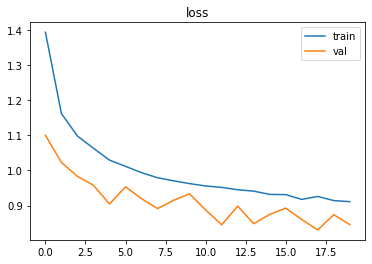

In [ ]:
plt.plot(resnet_history.history["loss"])
plt.plot(resnet_history.history["val_loss"])
plt.title("loss")
plt.legend(labels=["train", "val"])

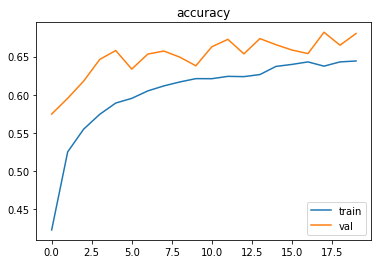

In [ ]:
plt.plot(resnet_history.history["acc"])
plt.plot(resnet_history.history["val_acc"])
plt.title("accuracy")
plt.legend(labels=["train", "val"])

In [ ]:
model_resnet.evaluate(testing_set, verbose=1)

188/188 [==============================] - 4s 24ms/step - loss: 0.8456 - acc: 0.6803


[0.8456283211708069, 0.6803333163261414]

## EfficientNetB7


In [ ]:
!pip install efficientnet
import efficientnet.tfkeras as efn


     |████████████████████████████████| 51kB 4.4MB/s 


In [ ]:
pretrained_efnet = efn.EfficientNetB7(input_shape=(image_size, image_size, 3), weights='noisy-student', include_top=False)

258072576/258068648 [==============================] - 6s 0us/step


In [ ]:
for layer in pretrained_efnet.layers:
  layer.trainable = False

In [ ]:
def categorical_smooth_loss(y_true, y_pred, label_smoothing=0.1):
    loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

In [ ]:
lr_reduce = tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=3, verbose=1)
es_callback = tfk.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
x = pretrained_efnet.output
x = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x)
x = tf.keras.layers.Flatten(name="flatten_head")(x)
x = tf.keras.layers.Dense(64, activation="relu", name="dense_head")(x)
x = tf.keras.layers.Dropout(0.5, name="dropout_head")(x)

model_out = tf.keras.layers.Dense(6, activation='softmax', name="predictions_head")(x)
model_efnet = tfk.Model(inputs=pretrained_efnet.input, outputs=model_out)
model_efnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=categorical_smooth_loss,
                    metrics=['accuracy'])
model_efnet.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 64, 64, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 64, 64, 64)   256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 64, 64, 64)   0           stem_bn[0][0]                    
_______________________________________________________________________________________

In [ ]:
history_efnet = model_efnet.fit_generator(training_set, validation_data=testing_set, callbacks=[lr_reduce, es_callback], epochs=15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
878/878 [==============================] - 98s 112ms/step - loss: 1.7128 - accuracy: 0.2864 - val_loss: 1.7205 - val_accuracy: 0.3443
Epoch 2/15
878/878 [==============================] - 94s 107ms/step - loss: 1.5225 - accuracy: 0.4002 - val_loss: 1.5782 - val_accuracy: 0.6057
Epoch 3/15
878/878 [==============================] - 94s 107ms/step - loss: 1.4594 - accuracy: 0.4414 - val_loss: 1.4497 - val_accuracy: 0.5707
Epoch 4/15
878/878 [==============================] - 94s 107ms/step - loss: 1.4104 - accuracy: 0.4691 - val_loss: 1.3011 - val_accuracy: 0.5730
Epoch 5/15
878/878 [==============================] - 94s 107ms/step - loss: 1.3915 - accuracy: 0.4838 - val_loss: 1.3331 - val_accuracy: 0.5740
Epoch 6/15
878/878 [==============================] - 94s 107ms/step - loss: 1.3721 - accuracy: 0.5003 - val_loss: 1.3054 - val_accuracy: 0.6270
Epoch 7/15
878/878 [==============================] - 

In [ ]:
import matplotlib.pyplot as plt

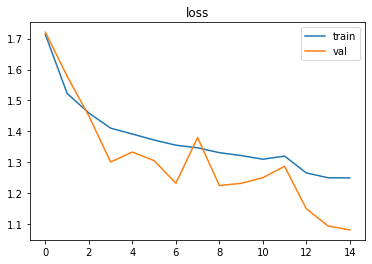

In [ ]:
plt.plot(history_efnet.history["loss"])
plt.plot(history_efnet.history["val_loss"])
plt.title("loss")
plt.legend(labels=["train", "val"])

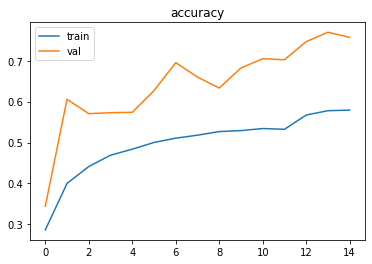

In [ ]:
plt.plot(history_efnet.history["accuracy"])
plt.plot(history_efnet.history["val_accuracy"])
plt.title("accuracy")
plt.legend(labels=["train", "val"])